# Procedure for an Unknown Variance

<ul>
    <li>State the null and alternative hypotheses.</li>
    <ul>
        <li>To check if 2 means are different, set $\Delta_0 = 0$.</li>
    </ul>
    <font size = "4">
        $$H_0: \mu_{1} - \mu_{2} = \Delta_0$$
        $$H_1: \mu_{1} - \mu_{2} \ne \Delta_0$$
    </font>
    <li>Specify a significance level $\alpha$. A commonly-used value is $\alpha=0.05$.</li>
    <li>Draw 2 samples one of size $n_{1}$, the other of size $n_{2}$.</li>
    <li>Calculate the sample means $\overline{x_{1}}$ and $\overline{x_{2}}$.</li>
    <li>Calculate the sample standard deviations $s_{x1}$ and $s_{x2}$.</li>
</ul>

<ul>
    <li>Pick one of the cases.</li>
    <ul>
        <li>Case 1: Unknown population variances are equal, $\sigma_{1} = \sigma_{2} = \sigma$. Compute the pooled variance $S_{p}^{2}$, degrees of freedom $v$, and corresponding t-statistic $t$. The results of this test are very sensitive to the assumption being correct. This is known as the <b>pooled t-test</b>. </li>
        <font size="4">
        \begin{align}
            S_{p}^{2} &= \frac{\left( n_{1} - 1 \right)s_{x1}^{2} + \left( n_{2} - 1 \right)s_{x2}^{2}}{n_{1} + n_{2} - 2} \\
            v &= n_{1} + n_{2} - 2 \\
            t &= \frac{\overline{x_{1}} - \overline{x_{2}} - \Delta_{0}}{S_{p} \sqrt{\frac{1}{n_{1}} + \frac{1}{n_{2}}}}
        \end{align}
        </font>
        <li>Case 2: Unknown population variances are not equal, $\sigma_{1} \ne \sigma{2}$. Use the following t statistic $t$ and degrees of freedom $v$. This is known as the two-sample t-test.</li>
        <font size="4">
        \begin{align}
            v &= \frac {\left( \frac{s_{x1}^{2}}{n_{1}} + \frac{s_{x2}^{2}}{n_{2}} \right)^{2}}
                       {\frac{\left( \frac{s_{x1}^{2}}{n_{1}} \right)^{2}}{n_{1} - 1} + \frac{\left( \frac{s_{x2}^{2}}{n_{2}} \right)^{2}}{n_{2} - 1}}\\
            t &= \frac{\overline{x_{1}} - \overline{x_{2}} - \Delta_{0}}{\sqrt{\frac{s_{x1}^{2}}{n_{1}} + \frac{s_{x2}^{2}}{n_{2}}}}
        \end{align}
        </font>
    </ul>
</ul>

<ul>
    <li>Using the $t$ distribution, calculate values of the t-statistic $t$ that define the acceptance and rejection regions:</li>
    <ul>
        <li>If the hypothesis test is two-sided, using $v$ degrees of freedom, calculate $t_{lo}$ and $t_{hi}$ such that:</li><br>
        <font size = "4">
            \begin{align}
            t_{lo} &= \mathrm{ppf}\left( \frac{\alpha}{2}, v \right); P(t \le t_{lo}) = \frac{\alpha}{2}\\\\
            t_{hi} &= \mathrm{ppf}\left( 1 - \frac{\alpha}{2}, v \right); P(t \ge t_{hi}) = \frac{\alpha}{2}
            \end{align}
        </font><br>
        <li>If the hypothesis test is one-sided and lower-bound, using $v$ degrees of freedom, calculate $t_{lo}$ such that:</li><br>
        <font size = "4">
            \begin{align}
            t_{lo} &= \mathrm{ppf}\left( \alpha, v \right); P(t \le t_{lo}) = \alpha
            \end{align}
        </font><br>
        <li>If the hypothesis test is one-sided and upper-bound, using $v$ degrees of freedom, calculate $t_{hi}$ such that:</li><br>
        <font size = "4">
            \begin{align}
            t_{hi} &= \mathrm{ppf}\left( 1 - \alpha, v \right); P(t \ge t_{hi}) = \alpha
            \end{align}
        </font><br>
    </ul>
</ul>

<ul>
    <li>The critical values $t_{lo}$ and $t_{hi}$ define the acceptance and rejection regions.</li>
    <ul>
        <li>If the hypothesis test is two-sided, fail to reject $H_0$ if $t_{lo} \le t \le t_{hi}$. Otherwise, reject $H_0$.</li>
        <li>If the hypothesis test is lower bound, fail to reject $H_0$ if $t \ge t_{lo}$. Otherwise, reject $H_0$.</li>
        <li>If the hypothesis test is upper bound, fail to reject $H_0$ if $t \le t_{hi}$. Otherwise, reject $H_0$.</li>
    </ul>
</ul>

# In Practice

## Case 1: Equal Population Variance $\sigma_{1} = \sigma_{2} = \sigma$

In [61]:
import numpy as np
import plots
import pandas as pd
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import hypothesis_testing as ht
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

In [22]:
figsize=(8, 8/1.6)

(3.0, 2.73)
(0.5, 0.5)


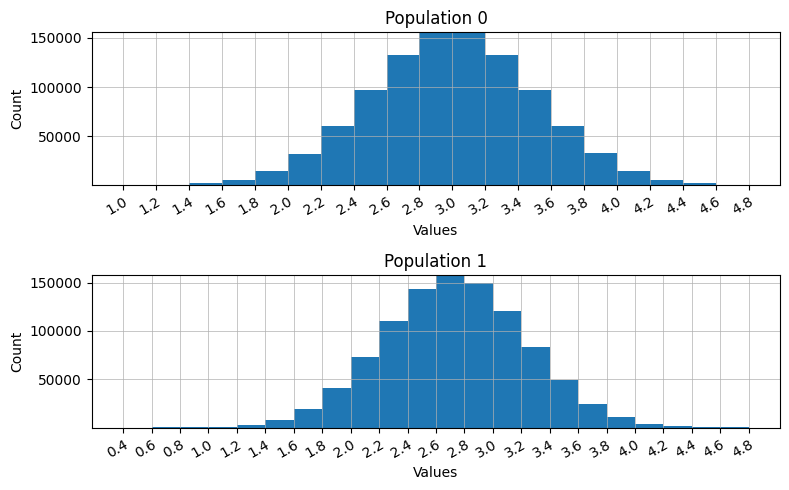

In [46]:
# Generate the populations
N = int(1e6)
sigma = 0.5
populations = tuple([np.random.normal(loc=3, scale=sigma, size=N), np.random.normal(loc=2.73, scale=sigma, size=N)])
n_pops = len(populations)
df_pops = tuple([pd.DataFrame(data=pop, columns=["value"]) for pop in populations])
mus = tuple([np.mean(pop) for pop in populations])
sigmas = tuple([np.std(pop) for pop in populations])
print(tuple([round(i, 2) for i in mus]))
print(tuple([round(i, 2) for i in sigmas]))

bins = tuple([np.arange(*tpl) for tpl in [(1, 5, 0.2), (0.4,5,0.2)]])
fig = plt.figure(figsize=figsize)
for i in range(len(populations)):
    ax = fig.add_subplot(2, 1, i + 1)
    _, _ = plots.histogram(df=df_pops[i], bins=bins[i], title=f"Population {i}", xlabel=["Values"], ylabel=["Count"], fig=fig, ax=ax)

In [49]:
# Draw 2 samples
n = (50, 36)
x = tuple([np.random.choice(populations[i], size=n[i]) for i in range(n_pops)])
x_bar = tuple([np.mean(x[i]) for i in range(n_pops)])
s_x = tuple([np.std(x[i], ddof=1) for i in range(n_pops)])
print(tuple([round(i, 2) for i in x_bar]))
print(tuple([round(i, 2) for i in s_x]))

(3.01, 2.74)
(0.61, 0.52)


In [51]:
# Compute pooled variance, degrees of freedom, and t-statistic
delta_0 = 0 # The null value for the null hypothesis. Corresponds to mu_1 - mu_2 =/>/< 0
sp = math.sqrt(
    (((n[0] - 1) * s_x[0]**2) + ((n[1] - 1) * s_x[1]**2)) / \
    (n[0] + n[1] - 2)
) # pooled standard deviation
v = n[0] + n[1] - 2 # degrees of freedom
t = (x_bar[0] - x_bar[1] - delta_0) / \
    (sp * math.sqrt((1/n[0]) + (1/n[1])))

### Two-sided Test

In [53]:
# H0: mu_1 - mu_2 = 0
# H1: mu_1 - mu_2 != 0
alpha = 0.05 # significance level

In [55]:
# Define the acceptance region, the region where the null hypothesis will not be rejected
t_lo = stats.t.ppf(alpha / 2, df=v)
t_hi = stats.t.ppf(1 - (alpha / 2), df=v)

In [58]:
# Check if the value is in the acceptance region
print(t_lo, t, t_hi)
if t >= t_lo and t <= t_hi:
    print(f"Fail to reject null hypothesis.")
    print(f"mu_1 - mu_2 = {delta_0}, with {1 - alpha} confidence level")
else:
    print(f"Reject null hypothesis.")
    print(f"mu_1 - mu_2 != {delta_0}, with {1 - alpha} confidence level")

-1.9886096669757092 2.223429325386152 1.9886096669757087
Reject null hypothesis.
mu_1 - mu_2 != 0, with 0.95 confidence level


In [70]:
# Or using statsmodels
d = {f"d{i + 1}": DescrStatsW(x[i]) for i in range(n_pops)}
cm = CompareMeans(**d)
results = cm.ttest_ind(value=delta_0)
_t, _pvalue, _df = results
print(results) # print results
print(t, _t) # compare t-statistic values
print(v, _df) # compare degrees of freedom

(2.223429325386145, 0.02887148184911875, 84.0)
2.223429325386152 2.223429325386145
84 84.0


In [73]:
# Or using scipy.stats
results = stats.ttest_ind(a=x[0], b=x[1])
_t = results.statistic
_pvalue = results.pvalue
_df = results.df
print(_t, _pvalue, _df)

2.223429325386152 0.028871481849118266 84.0


### One-Sided Lower Bound Test

In [74]:
# H0: mu_1 - mu_2 = 0
# H1: mu_1 - mu_2 < 0
alpha = 0.05 # significance level

In [75]:
# Define the acceptance region, the region where the null hypothesis will not be rejected
t_lo = stats.t.ppf(alpha, df=v)

In [76]:
# Check if the value is in the acceptance region
print(t_lo, t)
if t >= t_lo:
    print(f"Fail to reject null hypothesis.")
    print(f"mu_1 - mu_2 = {delta_0}, with {1 - alpha} confidence level")
else:
    print(f"Reject null hypothesis.")
    print(f"mu_1 - mu_2 < {delta_0}, with {1 - alpha} confidence level")

-1.6631966790936912 2.223429325386152
Fail to reject null hypothesis.
mu_1 - mu_2 = 0, with 0.95 confidence level


In [77]:
# Or using statsmodels
d = {f"d{i + 1}": DescrStatsW(x[i]) for i in range(n_pops)}
cm = CompareMeans(**d)
results = cm.ttest_ind(value=delta_0, alternative="smaller")
_t, _pvalue, _df = results
print(results) # print results
print(t, _t) # compare t-statistic values
print(v, _df) # compare degrees of freedom

(2.223429325386145, 0.9855642590754407, 84.0)
2.223429325386152 2.223429325386145
84 84.0


In [79]:
# Or using scipy.stats
results = stats.ttest_ind(a=x[0], b=x[1], alternative="less")
_t = results.statistic
_pvalue = results.pvalue
_df = results.df
print(_t, _pvalue, _df)

2.223429325386152 0.9855642590754409 84.0


### One-Sided Upper Bound Test

In [80]:
# H0: mu_1 - mu_2 = 0
# H1: mu_1 - mu_2 > 0
alpha = 0.05 # significance level

In [81]:
# Define the acceptance region, the region where the null hypothesis will not be rejected
t_hi = stats.t.ppf(1 - alpha, df=v)

In [82]:
# Check if the value is in the acceptance region
print(t, t_hi)
if t <= t_hi:
    print(f"Fail to reject null hypothesis.")
    print(f"mu_1 - mu_2 = {delta_0}, with {1 - alpha} confidence level")
else:
    print(f"Reject null hypothesis.")
    print(f"mu_1 - mu_2 > {delta_0}, with {1 - alpha} confidence level")

2.223429325386152 1.6631966790019561
Reject null hypothesis.
mu_1 - mu_2 > 0, with 0.95 confidence level


In [83]:
# Or using statsmodels
d = {f"d{i + 1}": DescrStatsW(x[i]) for i in range(n_pops)}
cm = CompareMeans(**d)
results = cm.ttest_ind(value=delta_0, alternative="larger")
_t, _pvalue, _df = results
print(results) # print results
print(t, _t) # compare t-statistic values
print(v, _df) # compare degrees of freedom

(2.223429325386145, 0.014435740924559374, 84.0)
2.223429325386152 2.223429325386145
84 84.0


In [84]:
# Or using scipy.stats
results = stats.ttest_ind(a=x[0], b=x[1], alternative="greater")
_t = results.statistic
_pvalue = results.pvalue
_df = results.df
print(_t, _pvalue, _df)

2.223429325386152 0.014435740924559133 84.0


## Case 2: Unequal Population Variance $\sigma_{1} \ne \sigma_{2}$

(3.0, 2.73)
(0.5, 0.25)


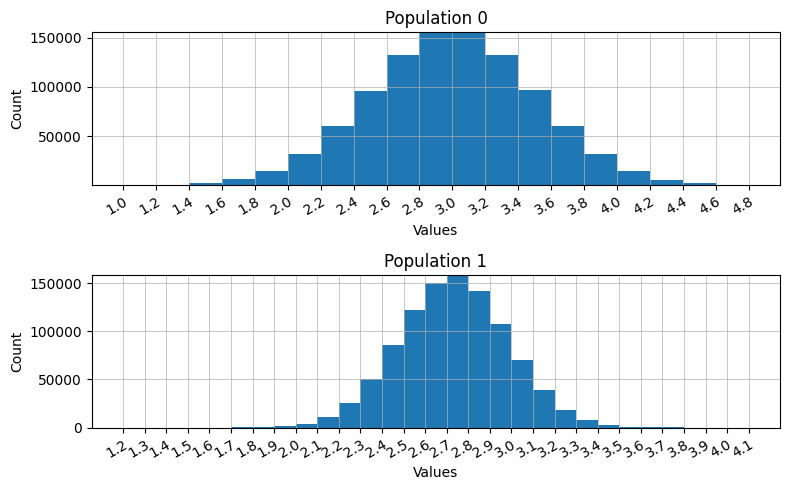

In [86]:
# Generate the populations
N = int(1e6)
populations = tuple([np.random.normal(loc=3, scale=0.5, size=N), np.random.normal(loc=2.73, scale=0.25, size=N)])
n_pops = len(populations)
df_pops = tuple([pd.DataFrame(data=pop, columns=["value"]) for pop in populations])
mus = tuple([np.mean(pop) for pop in populations])
sigmas = tuple([np.std(pop) for pop in populations])
print(tuple([round(i, 2) for i in mus]))
print(tuple([round(i, 2) for i in sigmas]))

bins = tuple([np.arange(*tpl) for tpl in [(1, 5, 0.2), (1.2,4.2,0.1)]])
fig = plt.figure(figsize=figsize)
for i in range(len(populations)):
    ax = fig.add_subplot(2, 1, i + 1)
    _, _ = plots.histogram(df=df_pops[i], bins=bins[i], title=f"Population {i}", xlabel=["Values"], ylabel=["Count"], fig=fig, ax=ax)

In [87]:
# Draw 2 samples
n = (33, 44)
x = tuple([np.random.choice(populations[i], size=n[i]) for i in range(n_pops)])
x_bar = tuple([np.mean(x[i]) for i in range(n_pops)])
s_x = tuple([np.std(x[i], ddof=1) for i in range(n_pops)])
print(tuple([round(i, 2) for i in x_bar]))
print(tuple([round(i, 2) for i in s_x]))

(3.04, 2.8)
(0.44, 0.26)


In [99]:
# Compute pooled variance, degrees of freedom, and t-statistic
delta_0 = 0 # The null value for the null hypothesis. Corresponds to mu_1 - mu_2 =/>/< 0

# degrees of freedom
v = (((s_x[0]**2) / (n[0])) + ((s_x[1]**2) / (n[1])))**2 / \
    ((((s_x[0]**2 / n[0])**2) / (n[0] - 1)) + (((s_x[1]**2 / n[1])**2) / (n[1] - 1)))
t = (x_bar[0] - x_bar[1] - delta_0) / math.sqrt(((s_x[0]**2) / (n[0])) + ((s_x[1]**2) / (n[1])))

### Two-sided Test

In [100]:
# H0: mu_1 - mu_2 = 0
# H1: mu_1 - mu_2 != 0
alpha = 0.05 # significance level

In [101]:
# Define the acceptance region, the region where the null hypothesis will not be rejected
t_lo = stats.t.ppf(alpha / 2, df=v)
t_hi = stats.t.ppf(1 - (alpha / 2), df=v)

In [102]:
# Check if the value is in the acceptance region
print(t_lo, t, t_hi)
if t >= t_lo and t <= t_hi:
    print(f"Fail to reject null hypothesis.")
    print(f"mu_1 - mu_2 = {delta_0}, with {1 - alpha} confidence level")
else:
    print(f"Reject null hypothesis.")
    print(f"mu_1 - mu_2 != {delta_0}, with {1 - alpha} confidence level")

-2.010441938252448 2.851700896088063 2.010441938252448
Reject null hypothesis.
mu_1 - mu_2 != 0, with 0.95 confidence level


In [103]:
# Or using statsmodels
d = {f"d{i + 1}": DescrStatsW(x[i]) for i in range(n_pops)}
cm = CompareMeans(**d)
results = cm.ttest_ind(value=delta_0, usevar="unequal")
_t, _pvalue, _df = results
print(results) # print results
print(t, _t) # compare t-statistic values
print(v, _df) # compare degrees of freedom

(2.851700896088063, 0.006386359045609309, 48.178863142673436)
2.851700896088063 2.851700896088063
48.178863142673436 48.178863142673436


In [104]:
# Or using scipy.stats
results = stats.ttest_ind(a=x[0], b=x[1], equal_var=False)
_t = results.statistic
_pvalue = results.pvalue
_df = results.df
print(_t, _pvalue, _df)

2.851700896088063 0.006386359045609309 48.178863142673436


### One-Sided Lower Bound Test

In [105]:
# H0: mu_1 - mu_2 = 0
# H1: mu_1 - mu_2 < 0
alpha = 0.05 # significance level

In [106]:
# Define the acceptance region, the region where the null hypothesis will not be rejected
t_lo = stats.t.ppf(alpha, df=v)

In [108]:
# Check if the value is in the acceptance region
print(t_lo, t)
if t >= t_lo:
    print(f"Fail to reject null hypothesis.")
    print(f"mu_1 - mu_2 = {delta_0}, with {1 - alpha} confidence level")
else:
    print(f"Reject null hypothesis.")
    print(f"mu_1 - mu_2 < {delta_0}, with {1 - alpha} confidence level")

-1.6771016745309333 2.851700896088063
Fail to reject null hypothesis.
mu_1 - mu_2 = 0, with 0.95 confidence level


In [111]:
# Or using statsmodels
d = {f"d{i + 1}": DescrStatsW(x[i]) for i in range(n_pops)}
cm = CompareMeans(**d)
results = cm.ttest_ind(value=delta_0, alternative="smaller", usevar="unequal")
_t, _pvalue, _df = results
print(results) # print results
print(t, _t) # compare t-statistic values
print(v, _df) # compare degrees of freedom

(2.851700896088063, 0.9968068204771954, 48.178863142673436)
2.851700896088063 2.851700896088063
48.178863142673436 48.178863142673436


In [113]:
# Or using scipy.stats
results = stats.ttest_ind(a=x[0], b=x[1], alternative="less", equal_var=False)
_t = results.statistic
_pvalue = results.pvalue
_df = results.df
print(_t, _pvalue, _df)

2.851700896088063 0.9968068204771954 48.178863142673436


### One-Sided Upper Bound Test

In [114]:
# H0: mu_1 - mu_2 = 0
# H1: mu_1 - mu_2 > 0
alpha = 0.05 # significance level

In [115]:
# Define the acceptance region, the region where the null hypothesis will not be rejected
t_hi = stats.t.ppf(1 - alpha, df=v)

In [116]:
# Check if the value is in the acceptance region
print(t, t_hi)
if t <= t_hi:
    print(f"Fail to reject null hypothesis.")
    print(f"mu_1 - mu_2 = {delta_0}, with {1 - alpha} confidence level")
else:
    print(f"Reject null hypothesis.")
    print(f"mu_1 - mu_2 > {delta_0}, with {1 - alpha} confidence level")

2.851700896088063 1.677101674530933
Reject null hypothesis.
mu_1 - mu_2 > 0, with 0.95 confidence level


In [119]:
# Or using statsmodels
d = {f"d{i + 1}": DescrStatsW(x[i]) for i in range(n_pops)}
cm = CompareMeans(**d)
results = cm.ttest_ind(value=delta_0, alternative="larger", usevar="unequal")
_t, _pvalue, _df = results
print(results) # print results
print(t, _t) # compare t-statistic values
print(v, _df) # compare degrees of freedom

(2.851700896088063, 0.0031931795228046546, 48.178863142673436)
2.851700896088063 2.851700896088063
48.178863142673436 48.178863142673436


In [120]:
# Or using scipy.stats
results = stats.ttest_ind(a=x[0], b=x[1], alternative="greater", equal_var=False)
_t = results.statistic
_pvalue = results.pvalue
_df = results.df
print(_t, _pvalue, _df)

2.851700896088063 0.0031931795228046546 48.178863142673436
